# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: Two-samples t-test
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

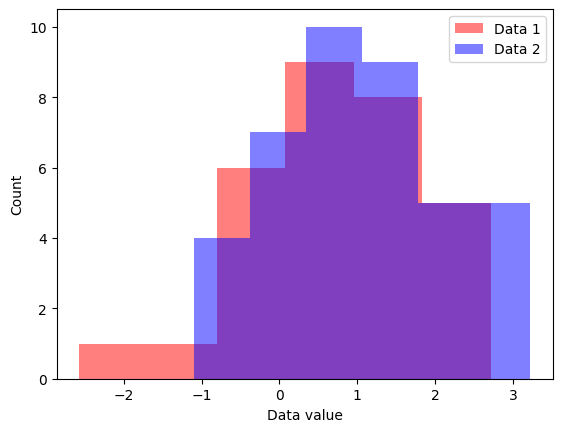

In [2]:
## generate the data

# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2


# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

# show their histograms
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [3]:
## now for the t-test

t,p = stats.ttest_ind(data1,data2,equal_var=True)

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = -0.879958, p=0.381981


In [ ]:
## a 2D space of t values

# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        
        # t-value denominator
        df = n1 + n2 - 2
        s  = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)
        
        # t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den

        
plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()